In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from statsmodels.tsa.arima_model import ARMA

In [2]:
df = pd.read_csv('./assets/ge_rates_nonadj.csv')

In [3]:
df.head()

,Date,Close,Volume,std,upper,lower,Rates
0,1990-10-26,4.208333,23842800.0,0.011546,4.231424,4.185242,7.17
1,1990-10-29,4.239583,23887200.0,0.011211,4.262006,4.217160,7.17
2,1990-10-30,4.395833,27138000.0,0.010366,4.416565,4.375101,7.17
3,1990-10-31,4.333333,15692400.0,0.010172,4.353677,4.312989,7.17
4,1990-11-01,4.364583,18014400.0,0.009890,4.384362,4.344804,7.06


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date      datetime64[ns]
Close            float64
Volume           float64
std              float64
upper            float64
lower            float64
Rates            float64
dtype: object

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df['moving_avg'] = df['Close'].rolling(20).mean()

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,Close,Volume,std,upper,lower,Rates,moving_avg
Date,,,,,,,
1990-11-23,4.468750,4462800.0,0.010901,4.490552,4.446948,7.06,4.453125
1990-11-26,4.447917,13736400.0,0.009763,4.467443,4.428391,7.06,4.465104
1990-11-27,4.458333,16050000.0,0.008682,4.475698,4.440968,7.06,4.476042
1990-11-28,4.385417,13208400.0,0.008721,4.402858,4.367976,7.06,4.475521
1990-11-29,4.427083,16971600.0,0.008318,4.443719,4.410447,7.06,4.480208


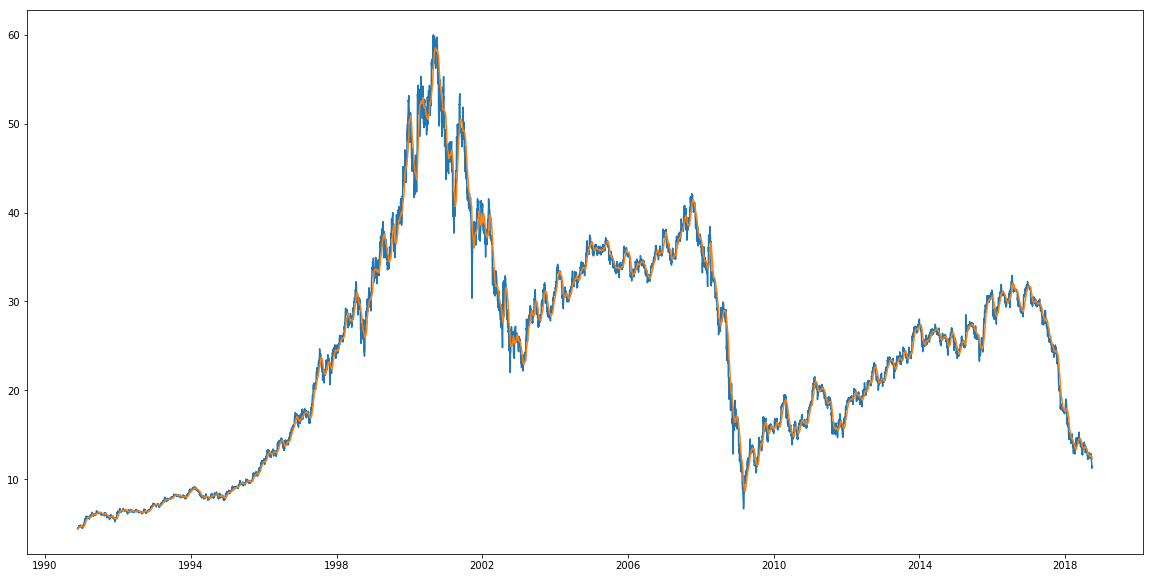

In [13]:
#fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.figure(figsize = (20,10))
plt.plot(df['Close']);
plt.plot(df['moving_avg']);

In [14]:
df.index

DatetimeIndex(['1990-11-23', '1990-11-26', '1990-11-27', '1990-11-28',
               '1990-11-29', '1990-11-30', '1990-12-03', '1990-12-04',
               '1990-12-05', '1990-12-06',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', name='Date', length=7017, freq=None)

In [15]:
dftest = df[6000:]
X_test = dftest.drop('Close', axis = 1)
y_test = dftest['Close']
X_test
#dftest

,Volume,std,upper,lower,Rates,moving_avg
Date,,,,,,
2014-09-17,29610800.0,0.138538,26.547075,25.992925,0.02,26.0675
2014-09-18,31598200.0,0.144852,26.499703,25.920295,0.02,26.0600
2014-09-19,38246200.0,0.153264,26.596530,25.983472,0.02,26.0530
2014-09-22,23005700.0,0.158675,26.397351,25.762649,0.02,26.0495
2014-09-23,21684800.0,0.159981,26.339961,25.700039,0.02,26.0405
2014-09-24,34059700.0,0.159692,26.249383,25.610617,0.02,26.0365
2014-09-25,30686900.0,0.171082,25.892162,25.207836,0.02,26.0075
2014-09-26,28931900.0,0.176187,25.982373,25.277625,0.02,25.9885
2014-09-29,30747600.0,0.194050,25.808100,25.031900,0.02,25.9605


In [16]:
dftrain = df[:5999]
X_train = dftrain.drop('Close', axis = 1)
y_train = dftrain['Close']

In [17]:
#plt.plot(df)

In [18]:
df.head()

,Close,Volume,std,upper,lower,Rates,moving_avg
Date,,,,,,,
1990-11-23,4.468750,4462800.0,0.010901,4.490552,4.446948,7.06,4.453125
1990-11-26,4.447917,13736400.0,0.009763,4.467443,4.428391,7.06,4.465104
1990-11-27,4.458333,16050000.0,0.008682,4.475698,4.440968,7.06,4.476042
1990-11-28,4.385417,13208400.0,0.008721,4.402858,4.367976,7.06,4.475521
1990-11-29,4.427083,16971600.0,0.008318,4.443719,4.410447,7.06,4.480208


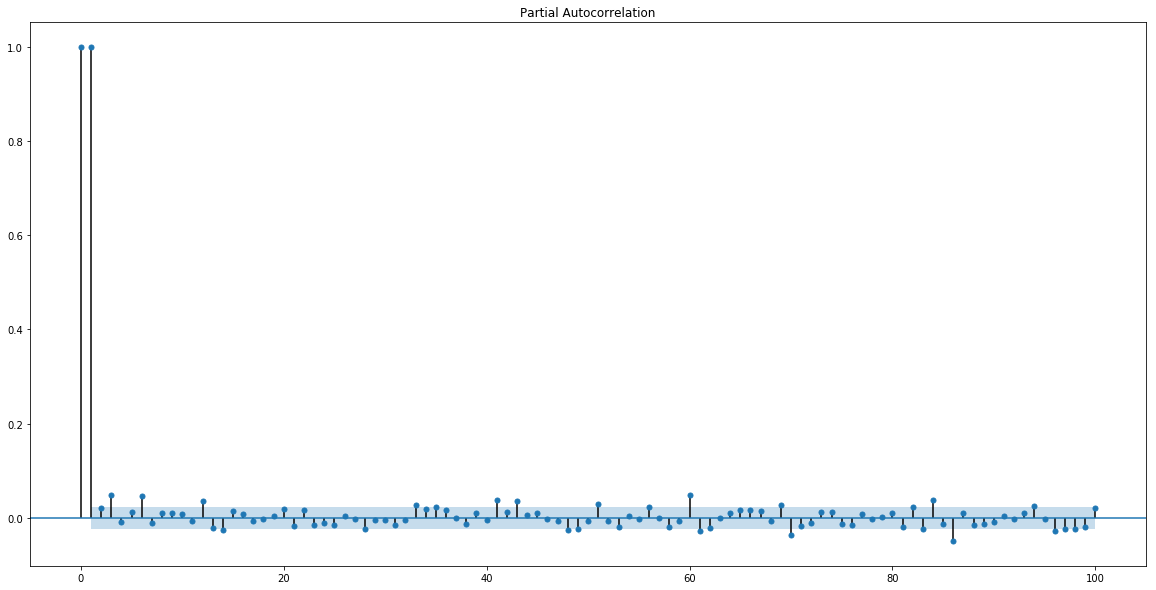

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
plot_pacf(df['Close'], lags=100, ax=ax)
plt.show();

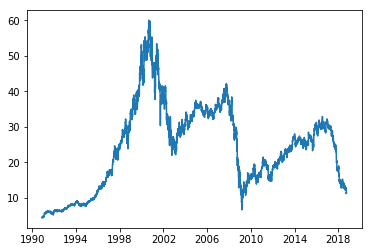

In [21]:
plt.plot(df['Close'])

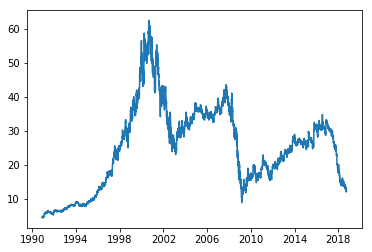

In [22]:
plt.plot(df['upper'])

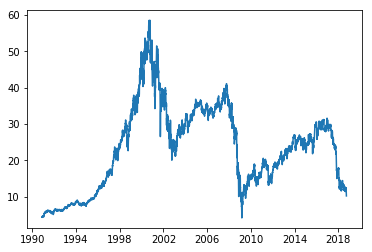

In [23]:
plt.plot(df['lower'])

In [24]:
ar1 = ARMA(endog = y_train, # Y variable
           order = (1,0),
           exog= X_train)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
#plt.plot(df['Adj Close']);

In [26]:
model = ar1.fit()

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

In [27]:
X_test.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', name='Date', length=1017, freq=None)

In [28]:
start = '2014-09-18'
end = '2018-09-28'
preds = model.predict(start=start, end=end)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [29]:
from sklearn.metrics import r2_score

r2_score(preds, df['Adj Close'])

NameError: name 'preds' is not defined